# How well do jobs and skills pay for Data Analysts?
#### Methodology
1. Import required libaries and dataset.
2. Clean the dataset.
3. Focus the analysis to job postings in India.
4. Calculate median salary.
5. Visualize the earnings of respective jobs.
6. Narrow the analysis further to Data Analyst jobs in India.
7. Calculate count and median earnings for various skills.
8. Plot the findings.

### Import Required Libraries for Analysis
This code imports libraries for data analysis and visualization. `pandas` handles structured data, `matplotlib` and `seaborn` create visualizations, and `ast` analyzes Python code structures. `datasets` likely accesses pre-built datasets for machine learning or analysis.

In [1]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import Dataset
This code loads a dataset from the `datasets` library (Hugging Face's). The `load_dataset` function fetches the `'lukebarousse/data_jobs'` dataset. The 'train' split of the dataset is then converted into a pandas DataFrame for easier data manipulation and analysis.

In [2]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

### Data Cleanup
The `pd.to_datetime()` function is used to convert the `job_posted_date` column into a datetime format. Then, the `job_posted_month` column is created by extracting the month from the `job_posted_date` using `.dt.month`.

The `new_list` function checks if a value in `job_skills` is not null, and if so, uses `ast.literal_eval() `to safely evaluate the string as a Python literal (i.e., converting it from a string representation of a list to an actual list). This transformation is applied to the `job_skills` column using `.apply()`.

In [3]:
#Converted the datatype for job_posted_date from object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

#Coverted the datatype for skill_list from string to list
def new_list(skill_list):  
   if pd.notna(skill_list): 
      return ast.literal_eval(skill_list)  
df['job_skills'] = df.job_skills.apply(new_list)


### Filtering and Cleaning Job Data for India
This code filters the dataset `df` to include only rows where the job's country is "India". It then removes rows with missing values in the `salary_year_avg` column, ensuring that the `df_India` dataframe contains only relevant and complete salary data for jobs in India.

In [59]:
df_India = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])

### Identifying and Sorting Top Jobs by Median Salary
This code first identifies the top 6 most common job titles in the `df_India` dataframe by counting the occurrences of each unique `job_title_short` and selecting the top 6. It then filters df_India to include only these top jobs. Next, the code calculates the median annual salary (`salary_year_avg`) for each job title, groups the data by `job_title_short`, and sorts the job titles by median salary in descending order. The resulting `India_job_order` provides a list of job titles ordered from highest to lowest median salary

In [60]:
top_jobs = df_India['job_title_short'].value_counts().head().index.to_list()

df_India_top_jobs = df_India[df_India['job_title_short'].isin(top_jobs)]

India_job_order = df_India_top_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
#India_job_order
top_jobs

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer']

### Visualizing Salary Range for Leading Data Jobs
This code generates a horizontal boxplot to visualize the salary distribution for the leading data jobs in India. The boxplot uses the `salary_year_avg` column on the x-axis and job_title_short on the y-axis, ordered by median salary in descending order (as previously calculated). To enhance readability, the x-axis labels are formatted to show salaries in thousands, with a dollar sign and a "k" suffix (e.g., $50k), making the salary figures more accessible.

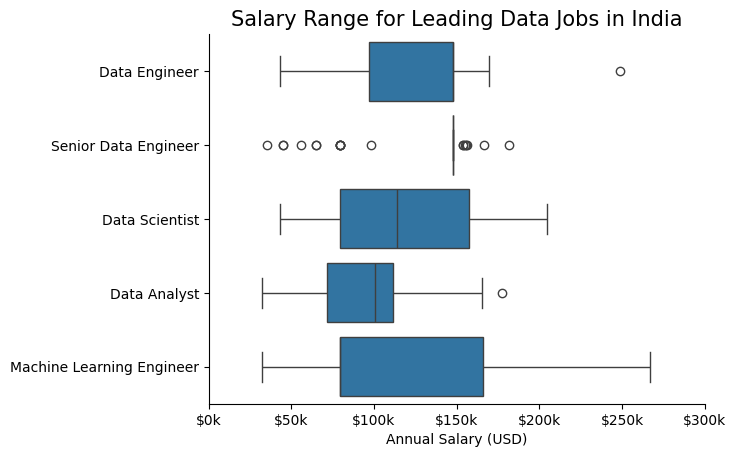

In [61]:
sns.boxplot(data=df_India_top_jobs, x='salary_year_avg', y='job_title_short', vert=False, order=India_job_order)
sns.despine()

plt.xlim(0,300000)
plt.xlabel('Annual Salary (USD)')
plt.title('Salary Range for Leading Data Jobs in India', fontsize=15)
plt.ylabel('')

ax = plt.gca() #Givess access to entire plot
#Format y-axis labels to display values in thousands with a dollar sign and "k" suffix
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

### Summary Statistics for Senior Data Engineer Salaries
This code filters the `df_India` dataframe to select rows where the job title is "Senior Data Engineer," retaining only the `job_title_short` and `salary_year_avg` columns. It then generates descriptive statistics for the `salary_year_avg` column, including the 25th, 50th (median), and 75th percentiles.

In [62]:
sen_data_eng = df_India[df_India['job_title_short'] == 'Senior Data Engineer'][['job_title_short', 'salary_year_avg']]

sen_data_eng['salary_year_avg'].describe(percentiles=(0.25, 0.5, 0.75))

count        57.000000
mean     132148.631579
std       35316.272354
min       35000.000000
25%      147500.000000
50%      147500.000000
75%      147500.000000
max      181765.000000
Name: salary_year_avg, dtype: float64

### Summary Statistics for Data Engineer Salaries
This code filters the `df_India` dataframe to select rows where the job title is "Data Engineer", retaining only the `job_title_short` and `salary_year_avg` columns. It then generates descriptive statistics for the `salary_year_avg` column, including the 25th, 50th (median), and 75th percentiles.

In [63]:
data_eng = df_India[df_India['job_title_short'] == 'Data Engineer'][['job_title_short', 'salary_year_avg']]

data_eng['salary_year_avg'].describe(percentiles=[0.25, 0.5, 0.75])

count       169.000000
mean     123312.390533
std       33914.612191
min       43200.000000
25%       96773.000000
50%      147500.000000
75%      147500.000000
max      249000.000000
Name: salary_year_avg, dtype: float64

### Summary Statistics for Machine Learning Engineer Salaries
This code filters the `df_India` dataframe to select rows where the job title is "Machine Learning Engineer," retaining only the `job_title_short` and `salary_year_avg` columns. It then generates descriptive statistics for the `salary_year_avg` column, including the 25th, 50th (median), and 75th percentiles.

In [64]:
mach_learn = df_India[df_India['job_title_short'] == 'Machine Learning Engineer'][['job_title_short', 'salary_year_avg']]

mach_learn['salary_year_avg'].describe(percentiles=[0.25, 0.5, 0.75])

count        57.000000
mean     111372.570175
std       48874.295220
min       32500.000000
25%       79200.000000
50%       79200.000000
75%      166000.000000
max      267000.000000
Name: salary_year_avg, dtype: float64

### Filtering Data for Data Analyst Jobs in India
This code filters the `df` dataframe to include only rows where the job country is "India" and the job title is "Data Analyst." It creates a new dataframe, `df_India_DA`, which contains only relevant data for Data Analyst roles in India, ensuring that no changes are made to the original df by using `.copy()`.

In [65]:
df_India_DA = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

### Cleaning and Exploding Job Skills for Data Analyst Jobs in India
This code first removes any rows in the `df_India_DA` dataframe where the `salary_year_avg` column contains missing values, ensuring that only rows with valid salary data remain. Next, it "explodes" the `job_skills` column, which contains lists of skills, into individual rows, so that each skill is represented in a separate row for each Data Analyst job posting. This transformation makes it easier to analyze each skill independently in the dataset.

In [66]:
df_India_DA = df_India_DA.dropna(subset=['salary_year_avg'])
df_India_DA = df_India_DA.explode('job_skills')

### Top 10 Job Skills for Data Analysts in India by Median Salary
This code groups the `df_India_DA` dataframe by `job_skills` and calculates two statistics for each skill: the count of job postings (`count`) and the median salary (`median`). It then sorts the skills based on the median salary in descending order, keeping only the top 10 skills with the highest median salaries. The resulting `India_sal_median` dataframe provides a summary of the top 10 job skills for Data Analysts in India, showing the number of postings and the median salary for each skill.

In [67]:
India_sal_median = df_India_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
India_sal_median = India_sal_median.sort_values(by='median', ascending=False).head(10)
India_sal_median

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


### Top 10 Job Skills for Data Analysts in India by Count and Median Salary
This code first groups the df_India_DA dataframe by job_skills and calculates the count of job postings (count) and the median salary (median) for each skill. It then sorts the skills by the count of job postings in descending order and selects the top 10. After that, the data is re-sorted by the median salary in descending order to get the top 10 skills with the highest median salaries. 

In [68]:
India_sal_count = df_India_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
India_sal_count = India_sal_count.sort_values(by='count', ascending=False).head(10)
India_sal_count = India_sal_count.sort_values(by='median', ascending=False).head(10)
India_sal_count

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


### Visualizing the Top 10 Skills for Data Analysts in India
This code creates a figure with two subplots to compare the top 10 skills for Data Analysts in India based on two metrics: median salary and job demand.

The first plot displays a barplot for the top 10 highest-paid skills, using the `India_sal_median` dataframe. The x-axis represents the median salary, and the y-axis lists the job skills. The salaries are formatted in thousands (e.g., $50K). The plot uses a color palette (`dark:m_r`) to visually distinguish the skills and removes the legend for simplicity.

The second plot displays a barplot for the top 10 most demanded skills (based on job postings), using the `India_sal_count` dataframe. The plot uses the same formatting for salary as the first subplot, ensuring consistency between the two.

Both subplots are adjusted to align the x-axis limits and enhance readability. The overall layout is managed by `plt.tight_layout()` to avoid overlap and ensure the subplots are neatly spaced.

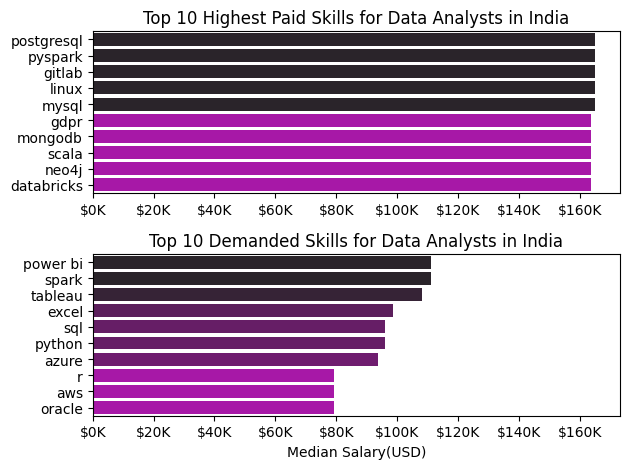

In [70]:
fig, ax = plt.subplots(2, 1)

#sns.set_theme(style='ticks')
sns.barplot(
    data=India_sal_median, 
    x='median', 
    y=India_sal_median.index, 
    ax=ax[0], 
    hue='median', 
    palette='dark:m_r', 
    legend=False
)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(
    data=India_sal_count, 
    x='median', 
    y=India_sal_count.index, 
    ax=ax[1], 
    hue='median', 
    palette='dark:m_r', 
    legend=False
)

ax[1].set_title('Top 10 Demanded Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary(USD)')
ax[1].set_xlim(ax[0].get_xlim())
#Format y-axis labels to display values in thousands with a dollar sign and "k" suffix
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()